In [8]:
# Basic ML pipeline for penguins_size.csv
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import joblib
import matplotlib.pyplot as plt

In [9]:
path = "penguins_size.csv"
df = pd.read_csv(path)

In [10]:
df.head(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [11]:
target_col = "species"

In [14]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [15]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()


In [21]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [22]:
clf = LogisticRegression(max_iter=1000)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", clf)
])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


pipe.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Columnas numéricas: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
Columnas categóricas: ['island', 'sex']

Exactitud (accuracy): 1.0

Classification report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



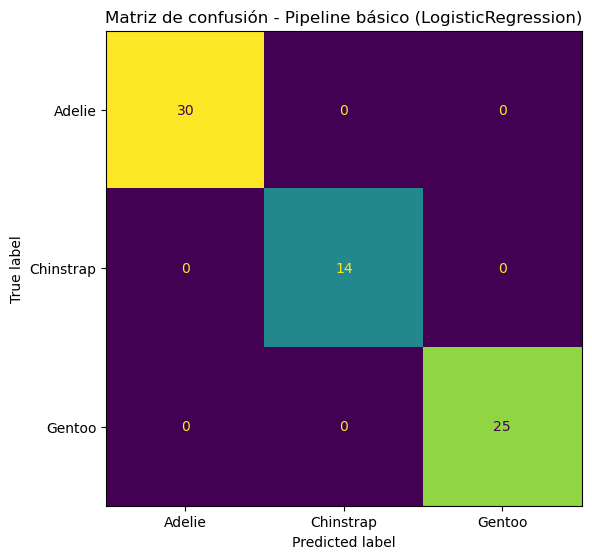

In [25]:
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)
print("\nExactitud (accuracy):", round(acc, 4))
print("\nClassification report:\n", report)

# === Confusion Matrix Plot ===
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, colorbar=False)  # Do not set any custom colors
plt.title("Matriz de confusión - Pipeline básico (LogisticRegression)")
plt.tight_layout()
plt.show()

In [27]:
model_path = "penguins_basic_pipeline.pkl"
joblib.dump(pipe, model_path)

print(f"\nModelo guardado en: {model_path}")


Modelo guardado en: penguins_basic_pipeline.pkl
